In [297]:
import pandas as pd
import numpy as np
from numpy import absolute
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
import matplotlib.path as mpath

In [298]:
df_b = pd.read_csv("bellman_ford_performance_results.csv")
df_d = pd.read_csv("dijkstra_performance_results.csv")

nv_list_b = df_b.vertexNum.unique()
nv_list_d = df_d.vertexNum.unique()


In [299]:
############# BELLMAN-FORD SPEEDUP #############

iterationNum_list_b = []
minProcessEdge_list_b = []
percentage_list_b = []
apprAttrValues_list_b = []


for nv in nv_list_b:
    
    original_speed = (df_b.loc[(df_b['vertexNum'] == nv) &
                         (df_b['sOriginalDistance'] == 1), 
                          'executionTime'])
    
    #print(original_speed)
    
    temp_df_b = df_b.loc[(df_b['vertexNum'] == nv)]
    
    iterationNum_l = []
    minProcessEdge_l = []
    percentage_l = []
    apprAttrValues_l = []
    
    minProcessEdge_l.append([1, 0, 0])
    apprAttrValues_l.append([1, 0])
    percentage_l.append([1, 0, 1.0])
    
    
    for index,row in temp_df_b.iterrows():
        
        if row['sMinEdgetoProcess'] == 1:
            
            speedup = (original_speed/row['executionTime']).to_numpy()[0]
            minProcessEdge_l.append([speedup, row['Error'], row['minProcessEdge']])
            
            
        elif row['sApprAttrValues'] == 1:
            
            speedup = (original_speed/row['executionTime']).to_numpy()[0]
            apprAttrValues_l.append([speedup, row['Error']])
            
        
        elif row['sReduceExecution'] == 1:
            
            speedup = (original_speed/row['executionTime']).to_numpy()[0]
            iterationNum_l.append([speedup, row['Error']])
            
            
        elif row['sPartialGraphProcess'] == 1:
            
            speedup = (original_speed/row['executionTime']).to_numpy()[0]
            percentage_l.append([speedup, row['Error'], row['percentage']])
            
    
    iterationNum_l.append([1, 0])
    
    iterationNum_list_b.append(iterationNum_l)
    minProcessEdge_list_b.append(minProcessEdge_l)
    percentage_list_b.append(percentage_l)
    apprAttrValues_list_b.append(apprAttrValues_l)
    
print(minProcessEdge_list_b)
#print(iterationNum_list_b)
#print(percentage_list_b)
#print(apprAttrValues_list_b)


[[[1, 0, 0], [1.044776119402985, 0.151353, 2.0], [1.0714285714285714, 0.255608, 3.0], [1.09375, 0.37686, 4.0], [1.09375, 0.611287, 6.0], [1.141304347826087, 1.056086, 11.0], [1.141304347826087, 2.091799, 17.0], [1.2209302325581395, 4.646204, 46.0], [1.25, 5.0939239999999995, 48.0], [1.1931818181818181, 5.49869, 50.0], [1.2138728323699421, 5.965165, 53.0], [1.25, 6.437405, 60.0], [1.25, 7.91851, 132.0], [1.3125, 9.756317999999998, 140.0], [1.3291139240506329, 11.765032000000001, 148.0], [1.390728476821192, 13.728124, 161.0], [1.5107913669064748, 20.548014000000002, 442.0]], [[1, 0, 0], [1.0605187319884726, 0.143648, 2.0], [1.069767441860465, 0.33098099999999997, 4.0], [1.0919881305637982, 0.5641189999999999, 6.0], [1.105105105105105, 0.9399719999999999, 9.0], [1.0919881305637982, 1.8351529999999998, 20.0], [1.146417445482866, 3.8729169999999997, 60.0], [1.160883280757098, 4.478176, 64.0], [1.1794871794871795, 5.086628, 67.0], [1.190938511326861, 5.745185, 70.0], [1.2105263157894737, 6.3

In [300]:
############# DIJKSTRA SPEEDUP #############

iterationNum_list_d = []
minProcessEdge_list_d = []
percentage_list_d = []
apprAttrValues_list_d = []


for nv in nv_list_d:
    
    original_speed = (df_d.loc[(df_d['vertexNum'] == nv) &
                         (df_d['sOriginalDistance'] == 1), 
                          'executionTime'])
    
    temp_df_d = df_d.loc[(df_d['vertexNum'] == nv)]
    
    iterationNum_l = []
    minProcessEdge_l = []
    percentage_l = []
    apprAttrValues_l = []
    
    minProcessEdge_l.append([1, 0, 0])
    apprAttrValues_l.append([1, 0])
    percentage_l.append([1, 0, 1.0])
    
    for index,row in temp_df_d.iterrows():
        
        if row['sMinEdgetoProcess'] == 1:
            
            speedup = (original_speed/row['executionTime']).to_numpy()[0]
            minProcessEdge_l.append([speedup, row['Error'], row['minProcessEdge']])
            
            
        elif row['sApprAttrValues'] == 1:
            
            speedup = (original_speed/row['executionTime']).to_numpy()[0]
            apprAttrValues_l.append([speedup, row['Error']])
            
        
        elif row['sReduceExecution'] == 1:
            
            speedup = (original_speed/row['executionTime']).to_numpy()[0]
            iterationNum_l.append([speedup, row['Error']])
            
        '''
        elif row['sPartialGraphProcess'] == 1:
            
            speedup = (original_speed/row['executionTime']).to_numpy()[0]
            percentage_l.append([speedup, row['Error'], row['percentage']])
        '''    
    
    iterationNum_l.append([1, 0])
    
    iterationNum_list_d.append(iterationNum_l)
    minProcessEdge_list_d.append(minProcessEdge_l)
    #percentage_list_d.append(percentage_l)
    apprAttrValues_list_d.append(apprAttrValues_l)
    
    
#print(iterationNum_list_d)


In [301]:
def draw_BFDJ(arr1_b, arr2_b, arr1_d, arr2_d, x_label, y_label):
    
    #star = mpath.Path.unit_regular_star(6)
    #rectangle = mpath.Path.unit_rectangle()
    rectangle = mpath.Path.unit_regular_asterisk(6)
    circle = mpath.Path.unit_circle()

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(arr2_b, arr1_b, color='red', label='bellman-ford', marker=rectangle, markersize=7)
    ax.plot(arr2_d, arr1_d, color='blue', label='dijkstra', marker=circle, markersize=4)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

    plt.legend()
    plt.show()

In [302]:
def prepare_draw_iteration_num(s, soe):

    for c in range(6):

        arr1_b = []
        arr2_b = []

        arr1_d = []
        arr2_d = []

        count = 1
        for i in iterationNum_list_b[c]:
            arr1_b.append(i[s])
            arr2_b.append(count)
            count+=1

        count = 1
        for i in iterationNum_list_d[c]:
            arr1_d.append(i[s])
            arr2_d.append(count)
            count+=1

            
        draw_BFDJ(arr1_b, arr2_b, arr1_d, arr2_d, "min processing edge", soe)
    


In [303]:
#df = pd.DataFrame(data, columns = ['Algo', 'VertexNum', 'speedup', 'inaccuracy'])





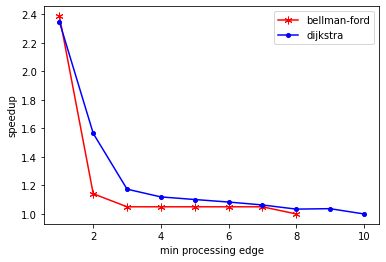

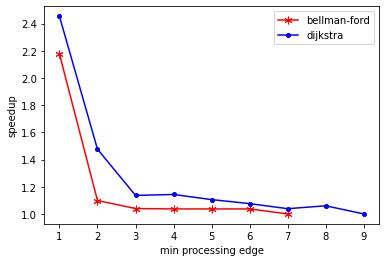

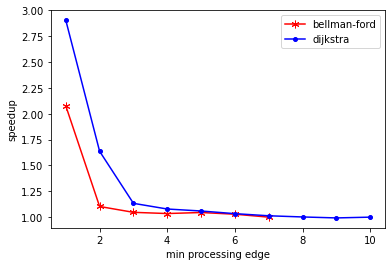

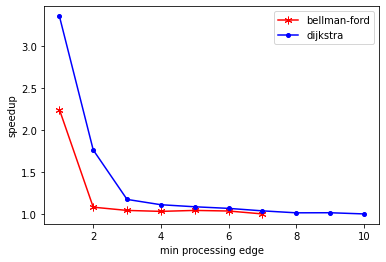

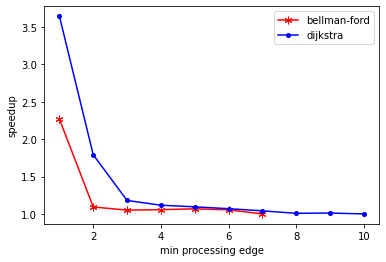

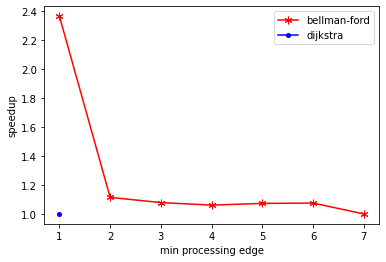

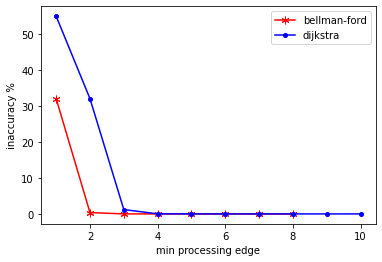

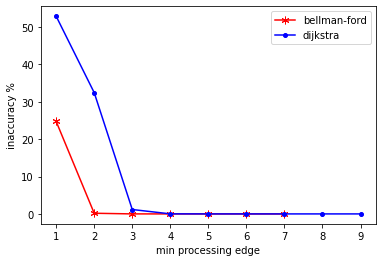

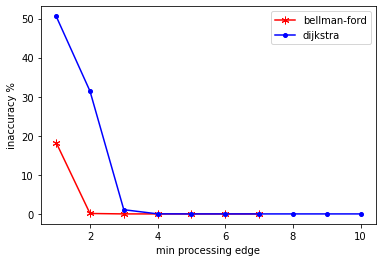

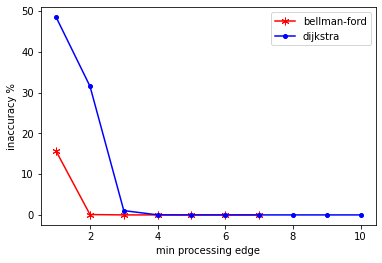

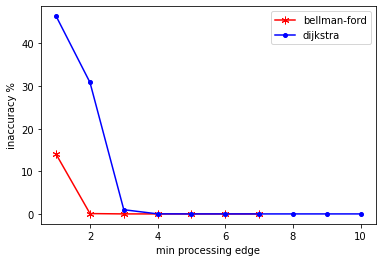

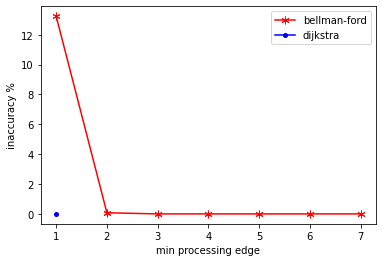

In [304]:
prepare_draw_iteration_num(0, "speedup")
prepare_draw_iteration_num(1, "inaccuracy %")

In [305]:
def prepare_draw_minProcessEdge(s, soe):

    for c in range(6):

        arr1_b = []
        arr2_b = []

        arr1_d = []
        arr2_d = []

        for i in minProcessEdge_list_b[c]:
            arr1_b.append(i[s])
            arr2_b.append(i[2])


        for i in minProcessEdge_list_d[c]:
            arr1_d.append(i[s])
            arr2_d.append(i[2])

            
        draw_BFDJ(arr1_b, arr2_b, arr1_d, arr2_d, "min processing edge", soe)
     
        
        


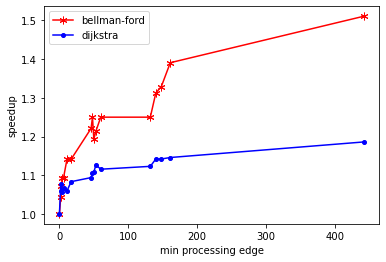

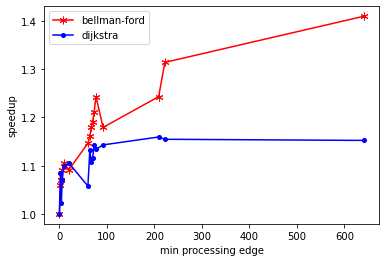

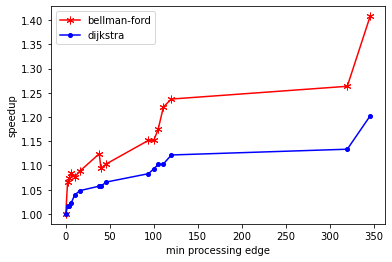

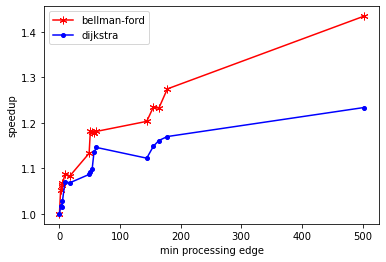

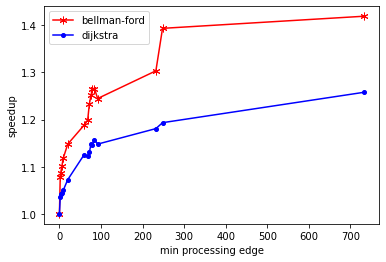

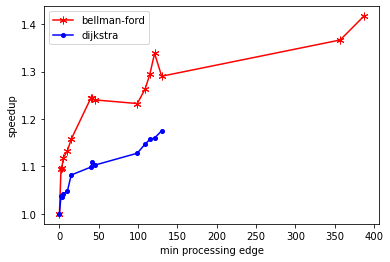

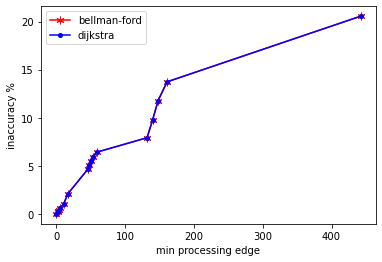

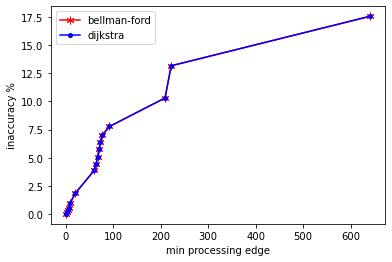

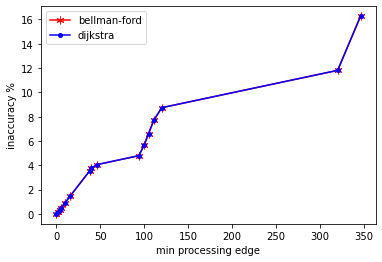

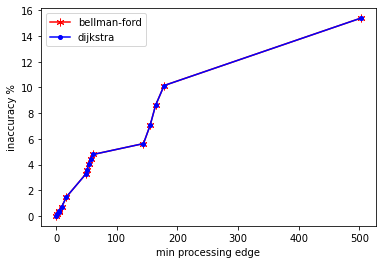

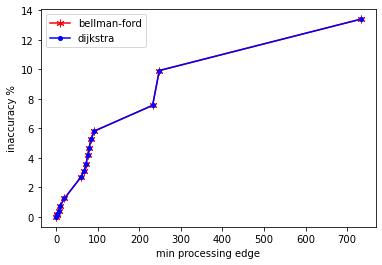

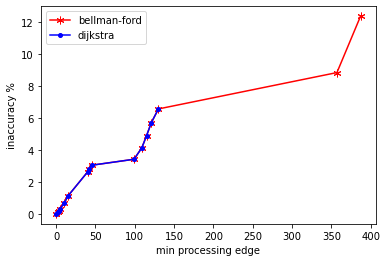

In [306]:
prepare_draw_minProcessEdge(0, "speedup")
prepare_draw_minProcessEdge(1, "inaccuracy %")

In [307]:
def prepare_draw_partialGraphProcess(s, soe):

    for c in range(6):

        arr1_b = []
        arr2_b = []

        arr1_d = []
        arr2_d = []

        for i in percentage_list_b[c]:
            arr1_b.append(i[s])
            arr2_b.append(i[2])

        '''
        for i in percentage_list_d[c]:
            arr1_d.append(i[s])
            arr2_d.append(i[2])
        '''    
            
        draw_BFDJ(arr1_b, arr2_b, arr1_d, arr2_d, "partialGraphProcess", soe)
    
        

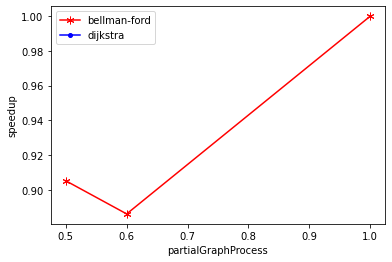

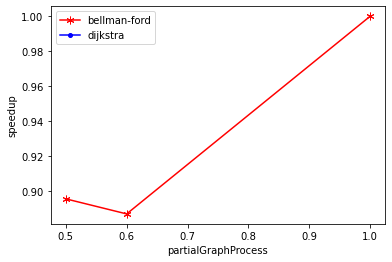

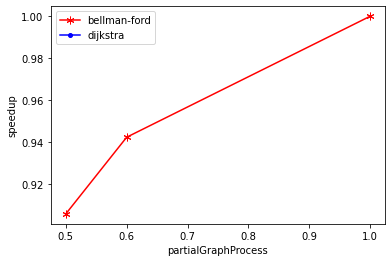

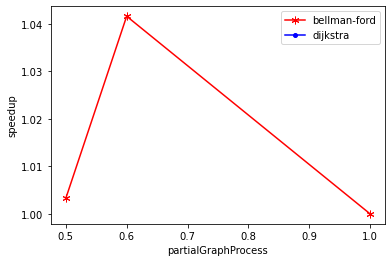

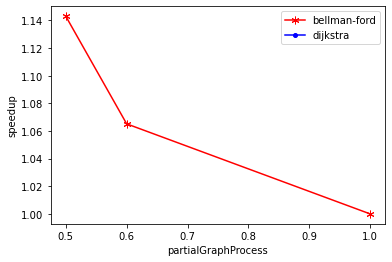

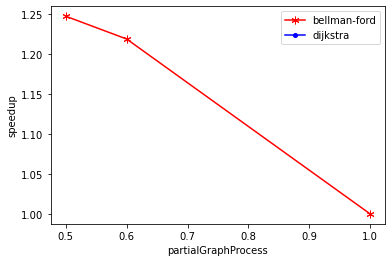

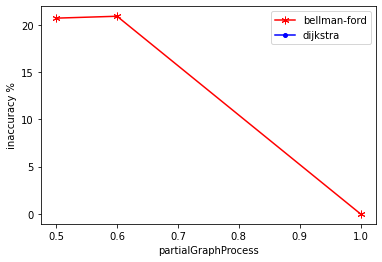

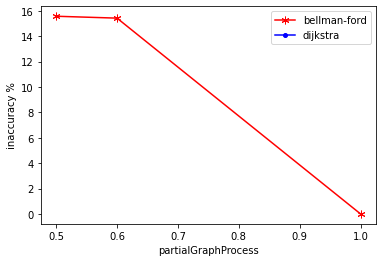

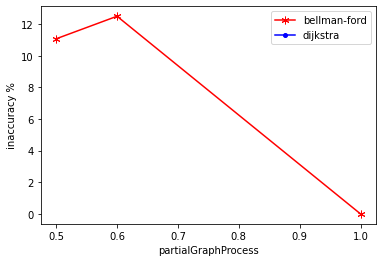

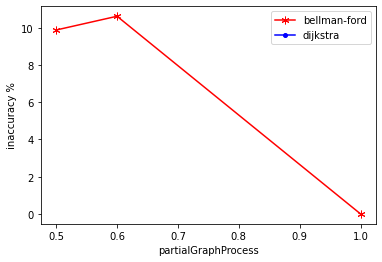

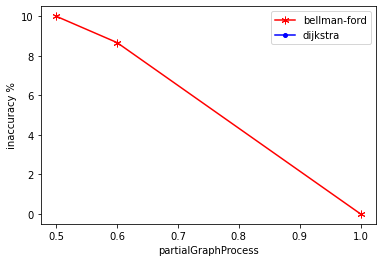

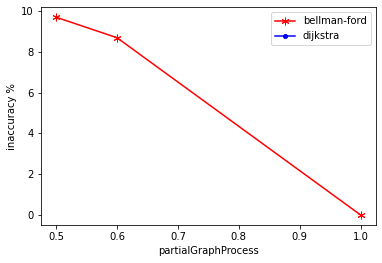

In [308]:
prepare_draw_partialGraphProcess(0, "speedup")
prepare_draw_partialGraphProcess(1, "inaccuracy %")

In [309]:
data = [];

l = ["DJ", "ReduceExecution"]
count = 0.0
speedupSum = 0.0
errorSum = 0.0
for i in iterationNum_list_d:
    for j in i:
        speedupSum += j[0]
        errorSum += j[1]
        count+=1
    
l.append(speedupSum/count)
l.append(errorSum/count)
data.append(l)

l = ["DJ", "MinEdgetoProcess"]
count = 0.0
speedupSum = 0.0
errorSum = 0.0
for i in minProcessEdge_list_d:
    for j in i:
        speedupSum += j[0]
        errorSum += j[1]
        count+=1
    
l.append(speedupSum/count)
l.append(errorSum/count)
data.append(l)


l = ["BF", "ReduceExecution"]
count = 0.0
speedupSum = 0.0
errorSum = 0.0
for i in iterationNum_list_b:
    for j in i:
        speedupSum += j[0]
        errorSum += j[1]
        count+=1
    
l.append(speedupSum/count)
l.append(errorSum/count)
data.append(l)

l = ["BF", "MinEdgetoProcess"]
count = 0.0
speedupSum = 0.0
errorSum = 0.0
for i in minProcessEdge_list_b:
    for j in i:
        speedupSum += j[0]
        errorSum += j[1]
        count+=1
    
l.append(speedupSum/count)
l.append(errorSum/count)
data.append(l)


l = ["BF", "PartialGraphProcess"]
count = 0.0
speedupSum = 0.0
errorSum = 0.0
for i in percentage_list_b:
    for j in i:
        speedupSum += j[0]
        errorSum += j[1]
        count+=1
    
l.append(speedupSum/count)
l.append(errorSum/count)
data.append(l)

df = pd.DataFrame(data, columns = ['Algo', 'Technique', 'mean-speedup', 'mean-inaccuracy'])

df

,Algo,Technique,mean-speedup,mean-inaccuracy
0,DJ,ReduceExecution,1.308700,8.345154
1,DJ,MinEdgetoProcess,1.097885,4.483839
2,BF,ReduceExecution,1.230035,2.634424
3,BF,MinEdgetoProcess,1.201151,4.417539
4,BF,PartialGraphProcess,1.045112,8.217088


In [310]:
data = [];
p = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]

for j in  range(1,16):
    
    l = ["DJ", "MinEdgetoProcess"]
    count = 0.0
    speedupSum = 0.0
    errorSum = 0.0
    
    for i in range(0,5):
        
        speedupSum += minProcessEdge_list_d[i][j][0]
        errorSum += minProcessEdge_list_d[i][j][1]

    l.append(p[j-1])
    l.append(speedupSum/5)
    l.append(errorSum/5)
    data.append(l)




for j in  range(1,16):
    
    l = ["BF", "MinEdgetoProcess"]
    count = 0.0
    speedupSum = 0.0
    errorSum = 0.0
    
    for i in range(0,5):
        
        speedupSum += minProcessEdge_list_b[i][j][0]
        errorSum += minProcessEdge_list_b[i][j][1]

    l.append(p[j-1])
    l.append(speedupSum/5)
    l.append(errorSum/5)
    data.append(l)


df = pd.DataFrame(data, columns = ['Algo', 'Technique','percentaile-compared-edge-number', 'mean-speedup', 'mean-inaccuracy'])

df

,Algo,Technique,percentaile-compared-edge-number,mean-speedup,mean-inaccuracy
0,DJ,MinEdgetoProcess,0.40,1.045819,0.132252
1,DJ,MinEdgetoProcess,0.50,1.031272,0.278151
2,DJ,MinEdgetoProcess,0.60,1.044126,0.450108
3,DJ,MinEdgetoProcess,0.70,1.064722,0.775627
4,DJ,MinEdgetoProcess,0.80,1.070738,1.422323
5,DJ,MinEdgetoProcess,0.90,1.082032,3.088689
6,DJ,MinEdgetoProcess,0.91,1.099434,3.924252
7,DJ,MinEdgetoProcess,0.92,1.101312,4.382310
8,DJ,MinEdgetoProcess,0.93,1.118212,4.937786
9,DJ,MinEdgetoProcess,0.94,1.130759,5.485524


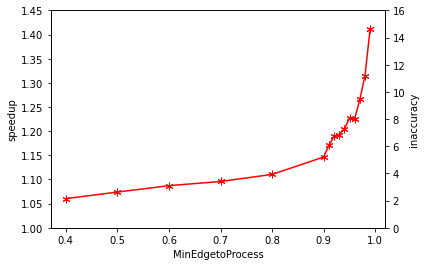

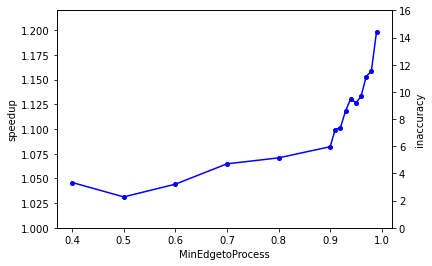

In [311]:
rectangle = mpath.Path.unit_regular_asterisk(6)
circle = mpath.Path.unit_circle()


t = p
s1 = df.loc[df['Algo'] == 'BF']['mean-speedup']
s2 = df.loc[df['Algo'] == 'DJ']['mean-speedup']


fig, ax1 = plt.subplots()

ax1.plot(t, s1, color='red', label='bellman-ford', marker=rectangle, markersize=7)
#ax1.plot(t, s2, color='blue', label='dijkstra', marker=circle, markersize=4)

ax1.set_xlabel('MinEdgetoProcess')
mn, mx = ax1.set_ylim(1, 1.45)
ax1.set_ylabel('speedup')

ax2 = ax1.twinx()
ax2.set_ylim(0, 16)
ax2.set_ylabel('inaccuracy')


plt.show()

fig, ax1 = plt.subplots()

#ax1.plot(t, s1, color='red', label='bellman-ford', marker=rectangle, markersize=7)
ax1.plot(t, s2, color='blue', label='dijkstra', marker=circle, markersize=4)

ax1.set_xlabel('MinEdgetoProcess')
mn, mx = ax1.set_ylim(1, 1.22)
ax1.set_ylabel('speedup')

ax2 = ax1.twinx()
ax2.set_ylim(0, 16)
ax2.set_ylabel('inaccuracy')


plt.show()
    



In [312]:
data = [];
p = [1, 2, 3, 4, 5, 6, 7]

for j in  range(1,7):
    
    l = ["DJ", "ReduceExecution"]
    count = 0.0
    speedupSum = 0.0
    errorSum = 0.0
    
    for i in range(0,5):
        
        speedupSum += iterationNum_list_d[i][j][0]
        errorSum += iterationNum_list_d[i][j][1]

    l.append(p[j-1])
    l.append(speedupSum/5)
    l.append(errorSum/5)
    data.append(l)


for j in  range(0,7):
    
    l = ["BF", "ReduceExecution"]
    count = 0.0
    speedupSum = 0.0
    errorSum = 0.0
    
    for i in range(0,5):
        
        speedupSum += iterationNum_list_b[i][j][0]
        errorSum += iterationNum_list_b[i][j][1]

    l.append(p[j])
    l.append(speedupSum/5)
    l.append(errorSum/5)
    data.append(l)


df = pd.DataFrame(data, columns = ['Algo', 'Technique','iter-number', 'mean-speedup', 'mean-inaccuracy'])

df

,Algo,Technique,iter-number,mean-speedup,mean-inaccuracy
0,DJ,ReduceExecution,1,1.646094,31.662390
1,DJ,ReduceExecution,2,1.159286,1.101382
2,DJ,ReduceExecution,3,1.113398,0.015339
3,DJ,ReduceExecution,4,1.089082,0.000988
4,DJ,ReduceExecution,5,1.065820,0.000780
5,DJ,ReduceExecution,6,1.038448,0.001018
6,BF,ReduceExecution,1,2.230164,20.930100
7,BF,ReduceExecution,2,1.103283,0.167015
8,BF,ReduceExecution,3,1.045672,0.002088
9,BF,ReduceExecution,4,1.041720,0.000051


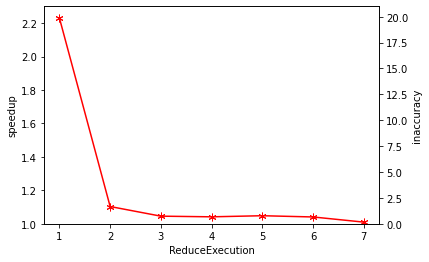

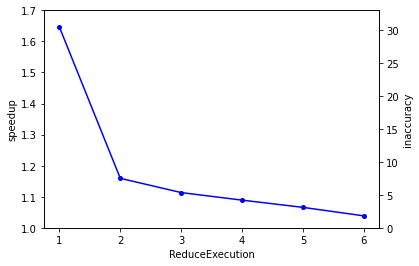

In [313]:
rectangle = mpath.Path.unit_regular_asterisk(6)
circle = mpath.Path.unit_circle()


t = p
s1 = df.loc[df['Algo'] == 'BF']['mean-speedup']
s2 = df.loc[df['Algo'] == 'DJ']['mean-speedup']


fig, ax1 = plt.subplots()

ax1.plot(t, s1, color='red', label='bellman-ford', marker=rectangle, markersize=7)
#ax1.plot(t, s2, color='blue', label='dijkstra', marker=circle, markersize=4)

ax1.set_xlabel('ReduceExecution')
mn, mx = ax1.set_ylim(1, 2.3)
ax1.set_ylabel('speedup')

ax2 = ax1.twinx()
ax2.set_ylim(0, 21)
ax2.set_ylabel('inaccuracy')


plt.show()

fig, ax1 = plt.subplots()

#ax1.plot(t, s1, color='red', label='bellman-ford', marker=rectangle, markersize=7)
ax1.plot([1, 2, 3, 4, 5, 6], s2, color='blue', label='dijkstra', marker=circle, markersize=4)

ax1.set_xlabel('ReduceExecution')
mn, mx = ax1.set_ylim(1, 1.7)
ax1.set_ylabel('speedup')

ax2 = ax1.twinx()
ax2.set_ylim(0, 33)
ax2.set_ylabel('inaccuracy')


plt.show()

In [314]:
data = [];
p = [0.5, 0.6, 1.0]

for j in  range(0,3):
    
    l = ["BF", "PartialGraphProcess"]
    count = 0.0
    speedupSum = 0.0
    errorSum = 0.0
    
    for i in range(0,5):
        
        speedupSum += percentage_list_b[i][j][0]
        errorSum += percentage_list_b[i][j][1]

    l.append(p[j-1])
    l.append(speedupSum/5)
    l.append(errorSum/5)
    data.append(l)


df = pd.DataFrame(data, columns = ['Algo', 'Technique','percentage', 'mean-speedup', 'mean-inaccuracy'])

df

,Algo,Technique,percentage,mean-speedup,mean-inaccuracy
0,BF,PartialGraphProcess,1.0,1.000000,0.000000
1,BF,PartialGraphProcess,0.5,0.964361,13.620238
2,BF,PartialGraphProcess,0.6,0.970477,13.443294


Text(0, 0.5, 'inaccuracy')

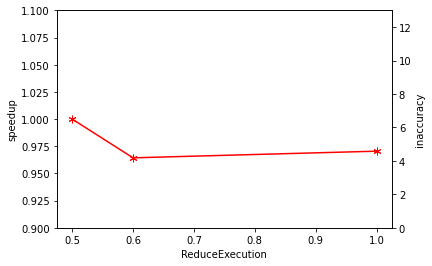

In [315]:
rectangle = mpath.Path.unit_regular_asterisk(6)
circle = mpath.Path.unit_circle()


t = p
s1 = df.loc[df['Algo'] == 'BF']['mean-speedup']
s2 = df.loc[df['Algo'] == 'DJ']['mean-speedup']


fig, ax1 = plt.subplots()

ax1.plot(t, s1, color='red', label='bellman-ford', marker=rectangle, markersize=7)
#ax1.plot(t, s2, color='blue', label='dijkstra', marker=circle, markersize=4)

ax1.set_xlabel('ReduceExecution')
mn, mx = ax1.set_ylim(0.9, 1.1)
ax1.set_ylabel('speedup')

ax2 = ax1.twinx()
ax2.set_ylim(0, 13)
ax2.set_ylabel('inaccuracy')

In [316]:
'''
mean, amp = 1.5, 1.5
t = arr2_b
s1 = arr1_b 

fig, ax1 = plt.subplots()

ax1.plot(t, s1, 'b-')

ax1.set_xlabel('iteration number')
mn, mx = ax1.set_ylim(mean-amp, mean+amp)
ax1.set_ylabel('speedup')

#km3yearToSv = 31.6887646e-6

ax2 = ax1.twinx()
ax2.set_ylim(mn, mx*5)
ax2.set_ylabel('inaccuracy')
'''




"\nmean, amp = 1.5, 1.5\nt = arr2_b\ns1 = arr1_b \n\nfig, ax1 = plt.subplots()\n\nax1.plot(t, s1, 'b-')\n\nax1.set_xlabel('iteration number')\nmn, mx = ax1.set_ylim(mean-amp, mean+amp)\nax1.set_ylabel('speedup')\n\n#km3yearToSv = 31.6887646e-6\n\nax2 = ax1.twinx()\nax2.set_ylim(mn, mx*5)\nax2.set_ylabel('inaccuracy')\n"

In [317]:
'''
fig, ax = plt.subplots()
fig.subplots_adjust(right=0.75)

twin1 = ax.twinx()
#twin2 = ax.twinx()

# Offset the right spine of twin2.  The ticks and label have already been
# placed on the right by twinx above.
#twin2.spines.right.set_position(("axes", 1.2))

p1, = ax.plot(arr2, arr1, "b-", label="speedup")
p2, = twin1.plot(arr2, arr1, "r-", label="inaccuracy")

ax.set_xlim(0, 7)
ax.set_ylim(1, 3)
twin1.set_ylim(0, 100)


ax.set_xlabel("iteration number")
ax.set_ylabel("speedup")
twin1.set_ylabel("inaccuracy")


ax.yaxis.label.set_color(p1.get_color())
twin1.yaxis.label.set_color(p2.get_color())


tkw = dict(size=4, width=1.5)
ax.tick_params(axis='y', colors=p1.get_color(), **tkw)
twin1.tick_params(axis='y', colors=p2.get_color(), **tkw)

ax.tick_params(axis='x', **tkw)

ax.legend(handles=[p1, p2])

plt.show()
'''


'\nfig, ax = plt.subplots()\nfig.subplots_adjust(right=0.75)\n\ntwin1 = ax.twinx()\n#twin2 = ax.twinx()\n\n# Offset the right spine of twin2.  The ticks and label have already been\n# placed on the right by twinx above.\n#twin2.spines.right.set_position(("axes", 1.2))\n\np1, = ax.plot(arr2, arr1, "b-", label="speedup")\np2, = twin1.plot(arr2, arr1, "r-", label="inaccuracy")\n\nax.set_xlim(0, 7)\nax.set_ylim(1, 3)\ntwin1.set_ylim(0, 100)\n\n\nax.set_xlabel("iteration number")\nax.set_ylabel("speedup")\ntwin1.set_ylabel("inaccuracy")\n\n\nax.yaxis.label.set_color(p1.get_color())\ntwin1.yaxis.label.set_color(p2.get_color())\n\n\ntkw = dict(size=4, width=1.5)\nax.tick_params(axis=\'y\', colors=p1.get_color(), **tkw)\ntwin1.tick_params(axis=\'y\', colors=p2.get_color(), **tkw)\n\nax.tick_params(axis=\'x\', **tkw)\n\nax.legend(handles=[p1, p2])\n\nplt.show()\n'